<a href="https://colab.research.google.com/github/BOLLOJUAISHWARYA/Google-collab-ANN/blob/main/Classificationmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LOAN PREDICTION 

Problem statement: Need to predict if the given person will get loan or not based on the given variables

Inference : Binary classification problem





# **steps performed in this sheet are**

-After importing the data handled missing values by replacing them with mode for categorical data and mean for numerical.

-Manual encoding I have done for categorical data.

-Standardized the numerical data(particular coulmns only)

-Built a model with 12 neurons -input layer ,activation function relu , output layer with one neuron sigmoid activation function.

-got an accuracy of 80%.


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

Connecting to google drive to import data inserted the code snippet 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Reading the csv file using pandas 


In [ ]:
traindata=pd.read_csv('/content/drive/MyDrive/Datasets/loan predictor/train/train.csv')

In [ ]:
print(traindata.shape)
traindata.head()

(614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
print(traindata.dtypes)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


summation of null values in each feature

In [ ]:
traindata.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

nunique-to Count number of distinct elements in specified axis.

In [ ]:
traindata.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

unique is used to display the unique values

In [ ]:
# Dropping loan_id
traindata.drop('Loan_ID', axis=1 , inplace=True)

In [ ]:
print(traindata['Credit_History'].unique())
print(traindata['Dependents'].unique())
print(traindata['Property_Area'].unique())


[ 1.  0. nan]
['0' '1' '2' '3+' nan]
['Urban' 'Rural' 'Semiurban']


In [ ]:
traindata.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


'Gender', 'Married','Education', 'Self_Employed', 'Property_Area'--categorical

for categorical missing values replaced with mode


In [ ]:
traindata['Gender'].fillna(traindata['Gender'].mode()[0],inplace=True)
traindata['Married'].fillna(traindata['Married'].mode()[0],inplace=True)
traindata['Education'].fillna(traindata['Education'].mode()[0],inplace=True)
traindata['Self_Employed'].fillna(traindata['Self_Employed'].mode()[0],inplace=True)
traindata['Property_Area'].fillna(traindata['Property_Area'].mode()[0],inplace=True)
traindata['Dependents'].fillna(traindata['Dependents'].mode()[0],inplace=True)

In [ ]:
traindata.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

For numerical missing values replaced with mean

In [ ]:
traindata['LoanAmount'].fillna(traindata['LoanAmount'].mean(),inplace=True)
traindata['Loan_Amount_Term'].fillna(traindata['Loan_Amount_Term'].mean(),inplace=True)
traindata['Credit_History'].fillna(traindata['Credit_History'].mean(),inplace=True)

In [ ]:
traindata.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Manual encoding

In [ ]:
traindata['Gender'].replace({'Male':1,'Female':0},inplace=True)
traindata['Education'].replace({'Graduate':1,'Not Graduate':0},inplace=True)
traindata['Property_Area'].replace({'Rural':0,'Semiurban':1,'Urban':2},inplace=True)
traindata['Self_Employed'].replace({'Yes':1,'No':0},inplace=True)
traindata['Married'].replace({'Yes':1,'No':0},inplace=True)
traindata['Dependents'].replace({'3+':3},inplace=True)

In [ ]:
traindata.dtypes

Gender                 int64
Married                int64
Dependents            object
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status           object
dtype: object

In [ ]:
traindata['Loan_Status'].replace({'Y':1,'N':0},inplace=True)

In [ ]:
continuous = ['LoanAmount','Loan_Amount_Term','Credit_History','CoapplicantIncome']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for var in continuous:
    traindata[var] = traindata[var].astype('float64')
    traindata[var] = scaler.fit_transform(traindata[var].values.reshape(-1, 1))

traindata['ApplicantIncome'] = scaler.fit_transform(traindata['ApplicantIncome'].values.reshape(-1, 1))

In [ ]:
traindata.dtypes

Gender                 int64
Married                int64
Dependents            object
Education              int64
Self_Employed          int64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [ ]:
traindata.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,0.072991,-0.554487,0.000000,0.279851,0.45164,2,1
1,1,1,1,1,0,-0.134412,-0.038732,-0.219273,0.279851,0.45164,0,0
2,1,1,0,1,1,-0.393747,-0.554487,-0.957641,0.279851,0.45164,2,1
3,1,1,0,0,0,-0.462062,0.251980,-0.314547,0.279851,0.45164,2,1
4,1,0,0,1,0,0.097728,-0.554487,-0.064454,0.279851,0.45164,2,1


In [ ]:
traindata.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         3
Property_Area          3
Loan_Status            2
dtype: int64

In [ ]:
traindata=traindata.astype(float)

In [ ]:
traindata

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1.0,0.0,0.072991,-0.554487,0.000000,0.279851,0.451640,2.0,1.0
1,1.0,1.0,1.0,1.0,0.0,-0.134412,-0.038732,-0.219273,0.279851,0.451640,0.0,0.0
2,1.0,1.0,0.0,1.0,1.0,-0.393747,-0.554487,-0.957641,0.279851,0.451640,2.0,1.0
3,1.0,1.0,0.0,0.0,0.0,-0.462062,0.251980,-0.314547,0.279851,0.451640,2.0,1.0
4,1.0,0.0,0.0,1.0,0.0,0.097728,-0.554487,-0.064454,0.279851,0.451640,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,1.0,0.0,-0.410130,-0.554487,-0.898095,0.279851,0.451640,0.0,1.0
610,1.0,1.0,3.0,1.0,0.0,-0.212557,-0.554487,-1.267279,-2.518655,0.451640,0.0,1.0
611,1.0,1.0,1.0,1.0,0.0,0.437174,-0.472404,1.269371,0.279851,0.451640,2.0,1.0
612,1.0,1.0,2.0,1.0,0.0,0.357064,-0.554487,0.483367,0.279851,0.451640,2.0,1.0


In [ ]:
traindata.dtypes

Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status          float64
dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
X = traindata.iloc[:,:-1].values
Y = traindata.iloc[:,-1].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
classmodel = tf.keras.models.Sequential()
classmodel.add(tf.keras.layers.Dense(units=12, activation='relu'))
classmodel.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [ ]:
classmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics =['accuracy'])

In [ ]:
classmodelhist=classmodel.fit(X_train, Y_train,validation_split=0.2 ,batch_size = 32, epochs = 50)

Epoch 1/50
13/13 [==============================] - 1s 15ms/step - loss: 0.6560 - accuracy: 0.6786 - val_loss: 0.6605 - val_accuracy: 0.7273
Epoch 2/50
13/13 [==============================] - 0s 5ms/step - loss: 0.6362 - accuracy: 0.7321 - val_loss: 0.6447 - val_accuracy: 0.7576
Epoch 3/50
13/13 [==============================] - 0s 5ms/step - loss: 0.6186 - accuracy: 0.7653 - val_loss: 0.6290 - val_accuracy: 0.8081
Epoch 4/50
13/13 [==============================] - 0s 4ms/step - loss: 0.6021 - accuracy: 0.7857 - val_loss: 0.6144 - val_accuracy: 0.8081
Epoch 5/50
13/13 [==============================] - 0s 3ms/step - loss: 0.5863 - accuracy: 0.7934 - val_loss: 0.6023 - val_accuracy: 0.8081
Epoch 6/50
13/13 [==============================] - 0s 5ms/step - loss: 0.5728 - accuracy: 0.8010 - val_loss: 0.5901 - val_accuracy: 0.8081
Epoch 7/50
13/13 [==============================] - 0s 4ms/step - loss: 0.5606 - accuracy: 0.8036 - val_loss: 0.5799 - val_accuracy: 0.8081
Epoch 8/50
13/13 [=

Plotted the graph to see the difference in loss and validation loss over training

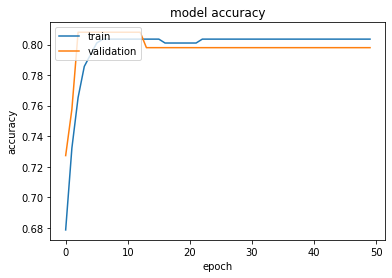

In [ ]:
plt.plot(classmodelhist.history['accuracy'])
plt.plot(classmodelhist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the graph we can see that after 25 epochs model isn't learning much so we can give 25-30 epochs